In [1]:
import re

def fix_name_of_experiment(name_text):
    name_text = name_text.replace('-', '+')
    name_text = name_text.replace('leaky_relu', 'Leaky-ReLu')
    name_text = name_text.replace('relu', 'ReLu')
    name_text = name_text.replace('sigmoid', 'Sigmoid')
    name_text = name_text.replace('SGD_momentum', 'SGD-0.9')
    name_text = name_text.replace('Dropout_0+', 'Dropout_0.0+')
    name_text = name_text.replace('_', '-')
    return name_text

In [2]:
import torch

list_of_dropout_rates = [0, 0.25, 0.5]
list_of_activation_functions = ['sigmoid', 'relu', 'leaky_relu']
list_of_optimizers = ['SGD', 'SGD_momentum', 'Adam']
dict_of_experiment_results = dict()
for dropout_rate in list_of_dropout_rates:
    for activation_function_type in list_of_activation_functions:
        for optimizer_type in list_of_optimizers:
            file_name='dropout_{}_actvfunc_{}_optimizer_{}.pth'.format(
                    dropout_rate, activation_function_type, optimizer_type)
            name_for_table = 'Dropout_{}-{}-{}'.format(
                    dropout_rate, activation_function_type, optimizer_type)

            name_for_table = fix_name_of_experiment(name_for_table)
            curr_model = torch.load(os.path.join("Results", file_name))
            curr_dict_results = curr_model['results']
            dict_of_experiment_results[name_for_table] = [curr_dict_results['train_acc'][-1],
                                                    curr_dict_results['test_acc'][-1],
                                                    curr_dict_results['train_loss'][-1],
                                                    curr_dict_results['test_loss'][-1]]

In [6]:
import pandas as pd
import os

df_results = pd.DataFrame.from_dict(dict_of_experiment_results, orient='index', 
                        columns=['Train Acc. %','Test Acc. %','Train Loss','Test Loss'])

results_file_name = 'df_results.csv'

if not os.path.isfile(results_file_name):
    df_results.to_csv(results_file_name, index=True)
else:
    print('File with the same name already exists')

File with the same name already exists


## Plots of the best performing model with/without agumented data

In [36]:
optimal_file_name='dropout_{}_actvfunc_{}_optimizer_{}.pth'.format(
                    0.5, 'leaky_relu', 'SGD_momentum')
optimal_model = torch.load(os.path.join("Results", optimal_file_name))
optimal_model_results_dict = optimal_model['results']

optimal_file_name_aug='dropout_{}_actvfunc_{}_optimizer_{}_augmented.pth'.format(
                    0.5, 'leaky_relu', 'SGD_momentum')
optimal_model_aug = torch.load(os.path.join("Results", optimal_file_name_aug))
optimal_model_results_dict_aug = optimal_model_aug['results']

range_epochs = list(range(1,len(optimal_model_results_dict['train_acc'])+1))

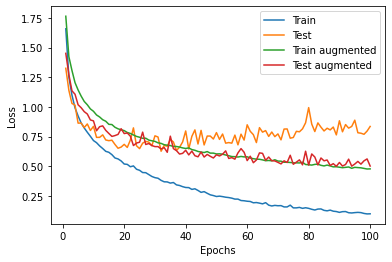

In [39]:
import matplotlib.pyplot as plt

plt.plot(range_epochs, optimal_model_results_dict['train_loss'], label = "Train")
plt.plot(range_epochs, optimal_model_results_dict['test_loss'], label = "Test")
plt.plot(range_epochs, optimal_model_results_dict_aug['train_loss'], label = "Train augmented")
plt.plot(range_epochs, optimal_model_results_dict_aug['test_loss'], label = 'Test augmented')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

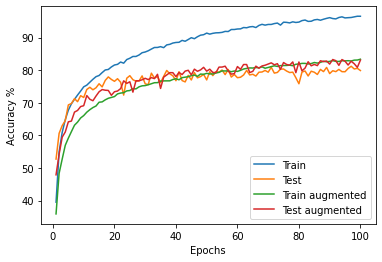

In [41]:
import matplotlib.pyplot as plt

plt.plot(range_epochs, optimal_model_results_dict['train_acc'], label = "Train")
plt.plot(range_epochs, optimal_model_results_dict['test_acc'], label = "Test")
plt.plot(range_epochs, optimal_model_results_dict_aug['train_acc'], label = "Train augmented")
plt.plot(range_epochs, optimal_model_results_dict_aug['test_acc'], label = "Test augmented")

plt.xlabel('Epochs')
plt.ylabel('Accuracy %')

plt.legend()